# Gathering and formating of data from different files into a single usable csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Measurements taken at different positions inside the net

In [2]:
DOinside=pd.read_excel('../data/oksygen/fornes2_excel_oksygen_Sal_330.xlsx', [0,1,2,3,4,5,6,7,8,9,10], usecols = [1,3,5,10,12,17,19,24,26], index_col = 0)

#Position 1
DOinside[0].columns = ['Pos1m3Temp', 'Pos1m3DO', 'Pos1m6Temp', 'Pos1m6DO', 'Pos1m9Temp', 'Pos1m9DO', 'Pos1m12Temp', 'Pos1m12DO']

#Position 4
DOinside[1] = DOinside[1][['Cat11TemperatureDeg','Cat11DisOxySaturated' ]]
DOinside[1].columns = ['Pos4m3Temp', 'Pos4m3DO']

#Position 5
DOinside[2] = DOinside[2][['Cat11TemperatureDeg','Cat11DisOxySaturated']]
DOinside[2].columns = ['Pos5m3Temp', 'Pos5m3DO']

#Position 6
DOinside[3] = DOinside[3][['Cat11TemperatureDeg','Cat11DisOxySaturated']]
DOinside[3].columns = ['Pos6m3Temp', 'Pos6m3DO']

#Position 7
DOinside[4] = DOinside[4][['Cat11TemperatureDeg','Cat11DisOxySaturated']]
DOinside[4].columns = ['Pos7m3Temp', 'Pos7m3DO']

#Position 12
#NOTE: Same position in net as 'Position 1'?
DOinside[5].columns = ['Pos1m3Temp', 'Pos1m3DO', 'Pos1m6Temp', 'Pos1m6DO', 'Pos1m9Temp', 'Pos1m9DO', 'Pos4m3Temp', 'Pos4m3DO']
DOinside[5].drop(['Pos4m3Temp', 'Pos4m3DO'], axis=1, inplace=True)
DOinside[0] = pd.concat([DOinside[0],DOinside[5]], ignore_index=False, verify_integrity=True)

#Position 22
#NOTE: pos 22 has measurements until 15:00, but was taken up from the water 14:39 according to log. Using data until 14:39 (from dict 6).
DOinside[7] = DOinside[6][['Cat21TemperatureDeg','Cat21DisOxySaturated', 'Cat32TemperatureDeg','Cat32DisOxySaturated']]
DOinside[7].columns = ['Pos22m2Temp', 'Pos22m2DO', 'Pos22m4Temp', 'Pos22m4DO']

#Position 21
DOinside[6] = DOinside[6][['Cat33TemperatureDeg','Cat33DisOxySaturated', 'Cat11TemperatureDeg','Cat11DisOxySaturated']]
DOinside[6].columns = ['Pos21m4Temp', 'Pos21m4DO', 'Pos21m2Temp', 'Pos21m2DO']

#Position 23
DOinside[8] = DOinside[8][['Cat33TemperatureDeg','Cat33DisOxySaturated', 'Cat11TemperatureDeg','Cat11DisOxySaturated']]
DOinside[8].columns = ['Pos23m4Temp', 'Pos23m4DO', 'Pos23m2Temp', 'Pos23m2DO']

#Position 31
DOinside[9] = DOinside[9][['Cat33TemperatureDeg','Cat33DisOxySaturated', 'Cat11TemperatureDeg','Cat11DisOxySaturated']]
DOinside[9].columns = ['Pos31m4Temp', 'Pos31m4DO', 'Pos31m2Temp', 'Pos31m2DO']

#Position 32
DOinside[10] = DOinside[10][['Cat21TemperatureDeg','Cat21DisOxySaturated', 'Cat32TemperatureDeg','Cat32DisOxySaturated']]
DOinside[10].columns = ['Pos32m2Temp', 'Pos32m2DO', 'Pos32m4Temp', 'Pos32m4DO']

for key, frame in DOinside.items():
    frame.index.name = 'Timestamp'
    
#Create a list of dataframes for easy concatenation later
DOinsideList= [ v for k,v in DOinside.items()]
del DOinsideList[5] # Remove pos12 measurements since they have been concatenated with pos1 (pos1=pos12)

## Measurements from DO sensors: 584 (North inside), 586 (South outside) and 588 (South inside)

In [3]:
DO58x = pd.read_excel('../data/oksygen/AADI_DO_Fornes_V2.xlsx', 3, usecols = [0,2,3,6,7,10,11], header=1)
DO58x.columns = ['Timestamp','NorthDO', 'NorthTemp', 'SouthOutsideDO', 'SouthOutsideTemp', 'SouthDO','SouthTemp']
DO58x['Timestamp'] = DO58x['Timestamp'].apply(lambda t: t.replace(second=0)).astype('datetime64[s]')
DO58x.set_index('Timestamp', inplace=True)

## Tide level data

In [4]:
# Tide level data
tide = pd.read_excel('../data/oksygen/AADI_DO_Fornes_V2.xlsx', 6, usecols = [0,1], header=0)
tide.columns = ['Timestamp','TideLevel']
tide['Timestamp'] =tide['Timestamp'].apply(lambda t: t.replace(second=0))
tide.set_index('Timestamp', inplace=True)

## Measurements from DO31 sensor placed outside of net

In [5]:
DO31 = pd.read_excel('../data/oksygen/AADI_DO_Fornes_V2.xlsx', 5, usecols = [0,2,4])
DO31.columns = ['Timestamp','DO31Temp', 'DO31DO']
DO31['Timestamp'] = DO31['Timestamp'].apply(lambda t: t.replace(second=0)).astype('datetime64[s]')
DO31.set_index('Timestamp', inplace=True)

## NTNU ADCP measurements (temperature (degC) and current(m/s)). Sensor placed outside of net.

In [6]:
# Time, temperature and sensor status 
ADCPcolumns = [0, 5, 11]
ADCPcolumnNames = ['Timestamp', 'TempADCP', 'ADCPstatus']

# Horizontal speed (cell 0-39)
ADCPcolumns.extend(list(range(67,107))) 
ADCPcolumnNames.extend(['CurrentHorizontal' + str(i) + 'm' for i in range(2,42)])

# Direction (0-39)
ADCPcolumns.extend(list(range(107,147)))
ADCPcolumnNames.extend(['CurrentDirection' + str(i) + 'm' for i in range(2,42)])

# North speed (0-39)
ADCPcolumns.extend(list(range(147,187)))
ADCPcolumnNames.extend(['CurrentNorth' + str(i) + 'm' for i in range(2,42)])

# East speed (0-39)
ADCPcolumns.extend(list(range(187,227)))
ADCPcolumnNames.extend(['CurrentEast' + str(i) + 'm' for i in range(2,42)])

# Vertical speed (0-39)
ADCPcolumns.extend(list(range(227,267)))
ADCPcolumnNames.extend(['CurrentVertical' + str(i) + 'm' for i in range(2,42)])

ADCP = pd.read_csv('../data/adcp_ntnu_fornes2.csv', usecols=ADCPcolumns, skiprows=182, skipfooter=72, engine='python')
ADCP.columns = ADCPcolumnNames

#Convert timestamp to local timezone (+2 hours)
ADCP['Timestamp'] = pd.to_datetime(ADCP['Timestamp'], format='%d.%m.%Y %H.%M.%S')
ADCP['Timestamp'] += pd.Timedelta(hours=2)
ADCP.set_index('Timestamp', inplace=True)

# Remove invalid values based on sensor status
ADCP.drop(ADCP[ADCP['ADCPstatus'] != 'OK'].index, inplace = True)
ADCP.drop('ADCPstatus', axis = 1, inplace=True)

# Convert current measurements from cm/s to to m/s
ADCP.loc[:,'CurrentHorizontal2m':'CurrentHorizontal41m'] = ADCP.loc[:,'CurrentHorizontal2m':'CurrentHorizontal41m'].divide(100, axis=0)
ADCP.loc[:,'CurrentNorth2m':'CurrentVertical41m'] = ADCP.loc[:,'CurrentNorth2m':'CurrentVertical41m'].divide(100, axis=0)

# Removal of outliers

In [7]:
# 3 std over/under
#for column in ADCP:
    #ADCP[column].mask(np.abs(stats.zscore(ADCP[column]) > 3), inplace=True)
    #print((ADCP[column].isna()).sum())

## Join frames, format index and save to csv

In [8]:
joined = pd.concat(DOinsideList ,axis=1, ignore_index=False, verify_integrity=True)
joined = pd.concat([joined, DO31, DO58x, tide, ADCP], axis = 1, ignore_index=False, verify_integrity=True)
#joined.index = joined.index.to_julian_date() #*24*60*60
#joined.index = pd.to_datetime(joined.index, unit='m')
joined.index = joined.index.strftime('%m-%d %H:%M') # Only show month, day, hours and minutes
joined.to_csv('../data/mergedData.csv')

In [9]:
joined.index.dtype

dtype('O')

In [10]:
#DOinside[10].head()
joined.head()
#joined.index.dtype
#pd.to_datetime(joined.index, format='%m/%d/%H/%M')
#joined.index.astype('datetime64[s]')
#joined.index = joined.index.to_datetime(format=)
#joined.tail(10)
#DO31.head()
#df[0].describe()

,Pos1m3Temp,Pos1m3DO,Pos1m6Temp,Pos1m6DO,Pos1m9Temp,Pos1m9DO,Pos1m12Temp,Pos1m12DO,Pos4m3Temp,Pos4m3DO,...,CurrentVertical32m,CurrentVertical33m,CurrentVertical34m,CurrentVertical35m,CurrentVertical36m,CurrentVertical37m,CurrentVertical38m,CurrentVertical39m,CurrentVertical40m,CurrentVertical41m
Timestamp,,,,,,,,,,,,,,,,,,,,,
07-02 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


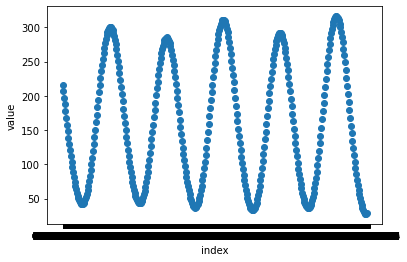

In [11]:
plt.scatter(joined.index, joined['TideLevel'])
plt.xlabel("index")
plt.ylabel("value")
plt.show()